In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# read data
tse1 = pd.read_csv("../data/processed/tidy_tse1.csv", index_col=[0, 1, 2])
df = pd.read_csv("../data/processed/tidy_df.csv", index_col=[0, 1, 2])
y_test = pd.read_csv("../assets/y_hats/univariate/y_test.csv", index_col=[0, 1, 2])

In [3]:
# read y_hat csv
y_hats_all = pd.read_csv("./../assets/y_hats/y_hats_all.csv", index_col=[0, 1, 2])

In [4]:
# agregated acuracy score
accuracy_table = pd.read_csv("./../assets/y_hats/accuracy_table.csv", index_col=[0, 1])
accuracy_table.round(2)

,,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4
,y_test,,,,,,,,,
Max_error,0.0,1989.29,17667.44,3611.48,3370.12,8148.71,33025.11,40758.24,37297.95,202488.02
Max_percentage_error,0.0,5895.00,88978.13,2068.17,34626.01,134665.30,19193.23,120789.44,125258.16,50075.35
MAE,0.0,38.75,38.47,34.88,39.41,53.45,60.13,71.75,82.17,343.69
MAPE,0.0,4.31,9.71,2.82,6.12,14.81,5.78,14.29,15.21,31.94
MSE,0.0,7001.96,606873.64,1142.82,93472.21,1391902.44,29555.81,1118622.10,1203296.21,513129.95
RMSE,0.0,83.69,191.96,93.50,117.39,231.98,443.72,523.63,608.82,3623.67
RMSPE,0.0,83.68,779.02,33.81,305.73,1179.79,171.92,1057.65,1096.95,716.33


In [5]:
# firm level accuracy score
accuracy_table_i = pd.read_csv("./../assets/y_hats/accuracy_table_i.csv", index_col=[0, 1])

mae = accuracy_table_i.loc[pd.IndexSlice[:, "MAE", :], :]
mape = accuracy_table_i.loc[pd.IndexSlice[:, "MAPE", :], :]
mse = accuracy_table_i.loc[pd.IndexSlice[:, "MSE", :], :]

In [12]:
mape
mape.reset_index().melt(id_vars=["level_0", "level_1"], var_name="model", value_name="score")

,level_0,level_1,model,score
0,あらた,MAPE,y_test,0.000000
1,いすゞ自動車,MAPE,y_test,0.000000
2,いなげや,MAPE,y_test,0.000000
3,かどや製油,MAPE,y_test,0.000000
4,きんでん,MAPE,y_test,0.000000
...,...,...,...,...
10885,ＶＴホールディングス,MAPE,y_hat_mlm4,10.090009
10886,ＷＤＢホールディングス,MAPE,y_hat_mlm4,1.255252
10887,ＷＯＷＯＷ,MAPE,y_hat_mlm4,10.399048
10888,ＺＯＺＯ,MAPE,y_hat_mlm4,2.073945


In [149]:
# individual sample error
error = pd.read_csv("../assets/y_hats/error.csv", index_col=[0, 1, 2])
error_abs = pd.read_csv("../assets/y_hats/error_abs.csv", index_col=[0, 1, 2])
error_p = pd.read_csv("../assets/y_hats/error_p.csv", index_col=[0, 1, 2])
error_p_abs = pd.read_csv("../assets/y_hats/error_p_abs.csv", index_col=[0, 1, 2])

## まずは企業ごとの誤差の分布を確認

In [18]:
mae_melt = mae.reset_index().melt(id_vars=["level_0", "level_1"], var_name="model", value_name="score")
mape_melt = mape.reset_index().melt(id_vars=["level_0", "level_1"], var_name="model", value_name="score")
mse_melt = mse.reset_index().melt(id_vars=["level_0", "level_1"], var_name="model", value_name="score")

Text(0.5, 1.0, 'MAE distribution')

<Figure size 1152x648 with 0 Axes>

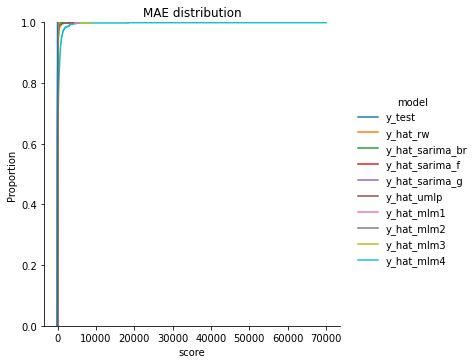

In [98]:
plt.figure(figsize=(16, 9))
# sns.histplot(data=mae_melt, x="score", hue="model", bins=50, multiple="dodge")
sns.displot(data=mae_melt, x="score", hue="model", kind="ecdf")
plt.title("MAE ECDF")

Text(0.5, 1.0, 'MAPE distribution 0 ~ 1 sample (! different total num)')

<Figure size 1152x648 with 0 Axes>

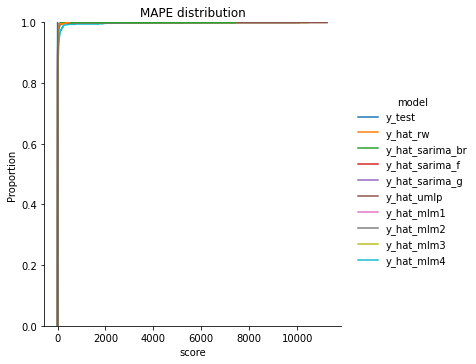

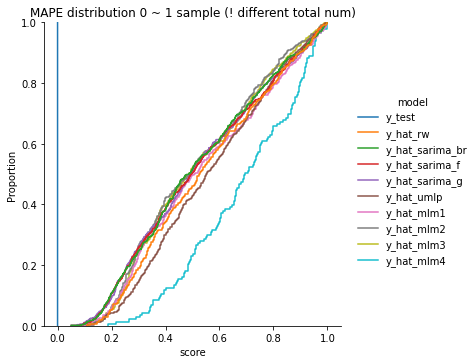

In [107]:
plt.figure(figsize=(16, 9))
# sns.histplot(data=mape_melt, x="score", hue="model", bins=50, multiple="dodge")
sns.displot(data=mape_melt, x="score", hue="model", kind="ecdf")
plt.title("MAPE ECDF")
sns.displot(data=mape_melt[mape_melt["score"] <= 1], x="score", hue="model", kind="ecdf")
plt.title("MAPE ECDF, 0 ~ 1 sample (! different total num)")

Text(0.5, 1.0, 'MSE distribution 0 ~ 1 sample (! different total num)')

<Figure size 1152x648 with 0 Axes>

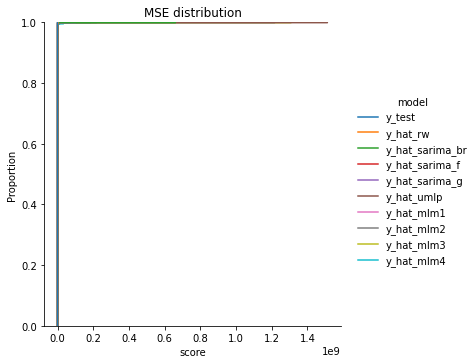

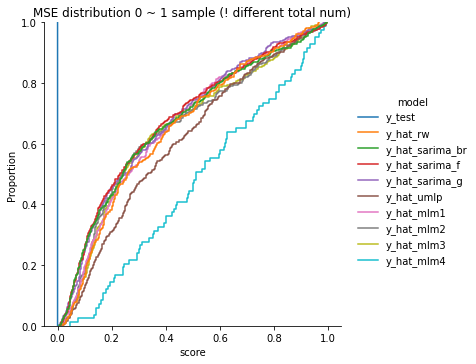

In [110]:
plt.figure(figsize=(16, 9))
# sns.histplot(data=mse_melt, x="score", hue="model", bins=50, multiple="dodge")
sns.displot(data=mse_melt, x="score", hue="model", kind="ecdf")
plt.title("MSE ECDF")
sns.displot(data=mse_melt[mse_melt["score"] <= 1], x="score", hue="model", kind="ecdf")
plt.title("MSE ECDF, 0 ~ 1 sample (! different total num)")

In [20]:
# https://seaborn.pydata.org/examples/kde_ridgeplot.html

In [21]:
# https://seaborn.pydata.org/examples/jitter_stripplot.html

MAPE, MSEは 0 ~ 1の間にあるはず、、、

In [69]:
# MAPE
len(mape_melt)

10890

In [23]:
len(mape_melt[mape_melt["score"] <= 1])

5034

In [24]:
len(mape_melt[mape_melt["score"] <= 1]) / len(mape_melt)

0.46225895316804405

In [398]:
# 先行研究は 30 ~ 40%くらい
(mape > 1).sum(axis=0) / len(mape)

y_test             0.000000
y_hat_rw           0.606061
y_hat_sarima_br    0.486685
y_hat_sarima_f     0.498623
y_hat_sarima_g     0.519743
y_hat_umlp         0.532599
y_hat_mlm1         0.595960
y_hat_mlm2         0.630854
y_hat_mlm3         0.638200
y_hat_mlm4         0.868687
dtype: float64

In [25]:
# MSE
len(mse_melt)

10890

In [26]:
len(mse_melt[mse_melt["score"] <= 1])

3781

In [27]:
len(mse_melt[mse_melt["score"] <= 1]) / len(mse_melt)

0.3471992653810836

In [70]:
(mse <= 1).sum(axis=0) / len(mse)

y_test             1.000000
y_hat_rw           0.257117
y_hat_sarima_br    0.354454
y_hat_sarima_f     0.333333
y_hat_sarima_g     0.317723
y_hat_umlp         0.342516
y_hat_mlm1         0.269972
y_hat_mlm2         0.263545
y_hat_mlm3         0.257117
y_hat_mlm4         0.076217
dtype: float64

予測誤差(Absolute error, absolute percentage error)が異常に大きい企業(y_hat)を特定する。

In [124]:
mape.describe()

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4
count,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.0,4.313953,9.708306,2.823022,6.123333,14.806769,5.778863,14.285043,15.209637,31.944189
std,0.0,24.340679,225.215044,10.140076,88.594166,342.113625,50.936578,305.926501,317.366629,234.626426
min,0.0,0.108712,0.049801,0.079664,0.071814,0.108270,0.051167,0.094949,0.090533,0.185546
25%,0.0,0.633784,0.468086,0.496089,0.507989,0.586712,0.629979,0.663215,0.677769,1.664993
50%,0.0,1.307412,0.978257,0.994169,1.056402,1.064089,1.286960,1.464974,1.552599,4.958196
75%,0.0,2.604576,1.865236,1.934714,2.136072,2.290723,2.953894,3.314285,3.480510,13.595323
max,0.0,492.518013,7428.137986,172.733304,2896.696746,11262.841325,1627.680038,10088.018752,10460.852271,5240.955894


umlpはmaxが馬鹿でかいけど、min, 25%, 50%, 75%も大して(sarimaよりも)小さくない。

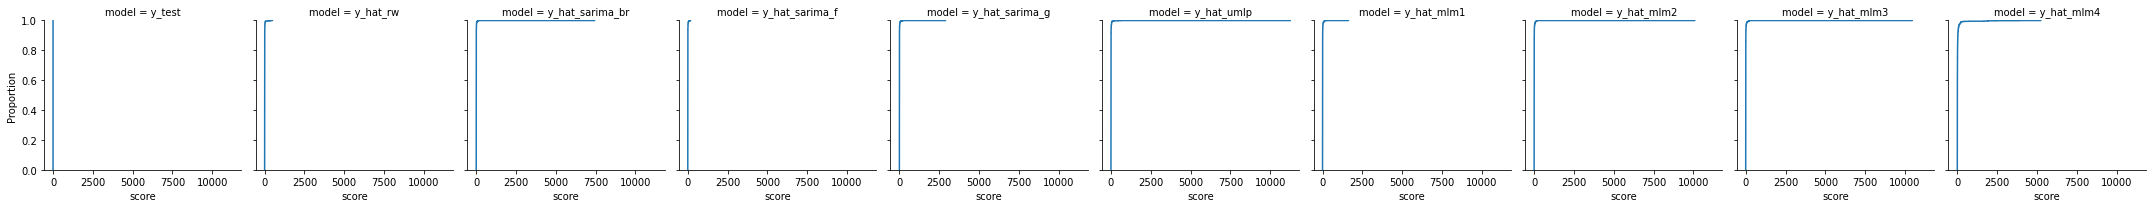

In [174]:
g = sns.FacetGrid(mape_melt, col="model")
g.map(sns.ecdfplot, "score")

y_hat_rw 660
y_hat_sarima_br 530
y_hat_sarima_f 543
y_hat_sarima_g 566
y_hat_umlp 580
y_hat_mlm1 649
y_hat_mlm2 687
y_hat_mlm3 695
y_hat_mlm4 946


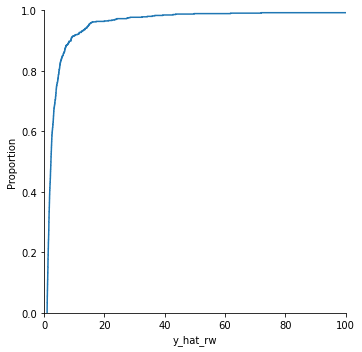

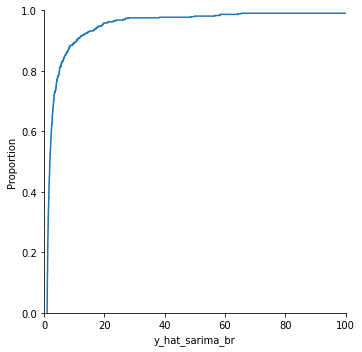

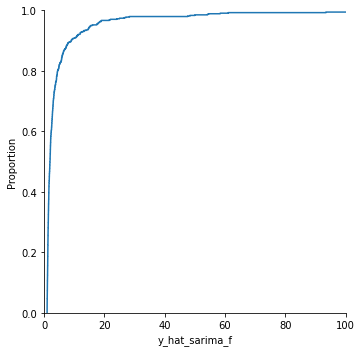

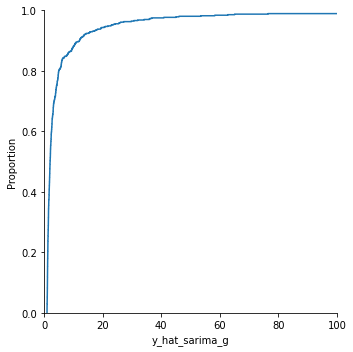

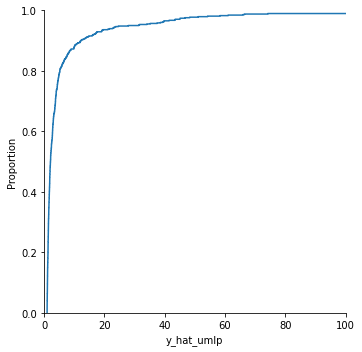

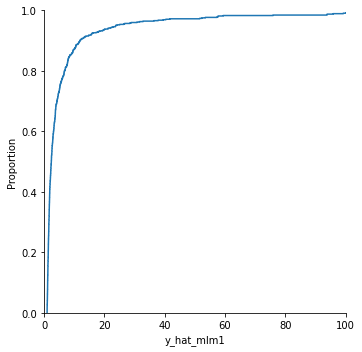

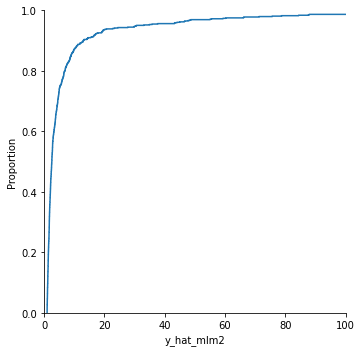

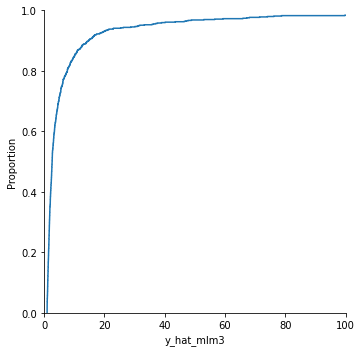

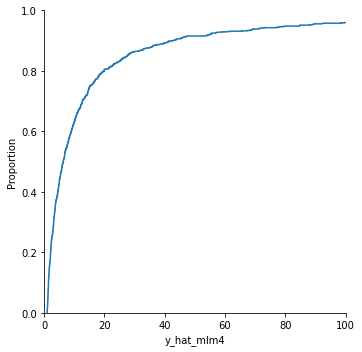

In [395]:
# large error
for i in mape.columns[1:]:
    large_error_firm = list(mape[mape[i] > 1].index.get_level_values(0))
    print(i, len(large_error_firm))
    sns.displot(data=mape[mape[i] > 1], x=i, kind="ecdf")
    plt.xlim(0, 100)
    plt.plot()

だいたい、mape=20くらいでほぼ全部を占める。それ以上はレアケース。  
レアケースである20~のextremeなエラー企業の調査

In [487]:
rw_ex_large_error_firm = list(mape[mape["y_hat_rw"] > 20].index.get_level_values(0))
print(len(rw_ex_large_error_firm))
rw_ex_large_error_firm

24


['オカムラ',
 'グローセル',
 'グローブライド',
 'タカミヤ',
 'タムラ製作所',
 'テイクアンドギヴ・ニーズ',
 'バンドー化学',
 'フェイス',
 'ホッカンホールディングス',
 'ヤマトホールディングス',
 '三信電気',
 '三城ホールディングス',
 '三機工業',
 '大阪製鉄',
 '山田コンサルティンググループ',
 '日工',
 '日本水産',
 '日本電設工業',
 '日水製薬',
 '旭化成',
 '林兼産業',
 '船井電機',
 'ＮＥＣネッツエスアイ',
 'ＴＰＲ']

In [390]:
####################################################################################################################################
n = 23
print(rw_ex_large_error_firm[n])
mape.loc[rw_ex_large_error_firm[n]].round(2)

ＴＰＲ


,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4
MAPE,0.0,49.73,56.55,48.39,58.26,51.13,57.67,46.68,48.86,111.76


In [391]:
y_hats_all.loc[rw_ex_large_error_firm[n]].round(2)

y_test  y_hat_rw  y_hat_sarima_br  y_hat_sarima_f  y_hat_sarima_g  \
会計年度 四半期                                                                      
2018 Q1    98.61     85.26            76.34           89.17           80.63   
     Q2    80.22     98.61            86.83           81.15           88.76   
     Q3    77.34     80.22            71.39           67.94           74.29   
     Q4    68.36     77.34            95.11           89.08           95.42   
2019 Q1    58.61     68.36            84.11           90.55           80.13   
     Q2    82.15     58.61            63.38           62.44           70.53   
     Q3    65.33     82.15            69.07           78.16           66.81   
     Q4     0.11     65.33            73.99           63.19           76.26   
2020 Q1     7.72      0.11            24.45           24.58           31.29   
     Q2    18.21      7.72            50.33           52.76           27.32   
     Q3    71.95     18.21            18.80           23.04            8.03   
     Q4   106.15     71.95            21.24            3.66          -10.35   

          y_hat_umlp  y_hat_mlm1  y_hat_mlm2  y_hat_mlm3  y_hat_mlm4  
会計年度 四半期                                                              
2018 Q1        72.36       84.37       90.38       93.29       98.44  
     Q2        86.07       89.28       90.15       94.60      161.89  
     Q3        69.67       78.50       78.10       77.04       22.93  
     Q4       102.12       95.71       96.50       93.38      132.11  
2019 Q1        87.47       88.67       79.50       79.91      141.17  
     Q2        81.05       68.42       69.63       70.29        2.06  
     Q3        65.10       86.19       76.15       80.82       66.05  
     Q4        66.65       75.38       60.50       63.37      145.44  
2020 Q1        54.18       24.32      -54.72      -53.33       74.89  
     Q2        20.49      -26.10       11.46        9.40       66.86  
     Q3        17.61       16.03        5.87       -1.70      300.30  
     Q4        73.55       27.77       52.27       60.57       70.88

In [392]:
error_p.loc[rw_ex_large_error_firm[n]].round(2)

(y_test - y_test) / y_test  (y_test - y_hat_rw) / y_test  \
会計年度 四半期                                                             
2018 Q1                          0.0                          0.14   
     Q2                          0.0                         -0.23   
     Q3                          0.0                         -0.04   
     Q4                          0.0                         -0.13   
2019 Q1                          0.0                         -0.17   
     Q2                          0.0                          0.29   
     Q3                          0.0                         -0.26   
     Q4                          0.0                       -592.91   
2020 Q1                          0.0                          0.99   
     Q2                          0.0                          0.58   
     Q3                          0.0                          0.75   
     Q4                          0.0                          0.32   

          (y_test - y_hat_sarima_br) / y_test  \
会計年度 四半期                                        
2018 Q1                                  0.23   
     Q2                                 -0.08   
     Q3                                  0.08   
     Q4                                 -0.39   
2019 Q1                                 -0.44   
     Q2                                  0.23   
     Q3                                 -0.06   
     Q4                               -671.66   
2020 Q1                                 -2.17   
     Q2                                 -1.76   
     Q3                                  0.74   
     Q4                                  0.80   

          (y_test - y_hat_sarima_f) / y_test  \
会計年度 四半期                                       
2018 Q1                                 0.10   
     Q2                                -0.01   
     Q3                                 0.12   
     Q4                                -0.30   
2019 Q1                                -0.54   
     Q2                                 0.24   
     Q3                                -0.20   
     Q4                              -573.48   
2020 Q1                                -2.18   
     Q2                                -1.90   
     Q3                                 0.68   
     Q4                                 0.97   

          (y_test - y_hat_sarima_g) / y_test  (y_test - y_hat_umlp) / y_test  \
会計年度 四半期                                                                       
2018 Q1                                 0.18                            0.27   
     Q2                                -0.11                           -0.07   
     Q3                                 0.04                            0.10   
     Q4                                -0.40                           -0.49   
2019 Q1                                -0.37                           -0.49   
     Q2                                 0.14                            0.01   
     Q3                                -0.02                            0.00   
     Q4                              -692.28                         -604.94   
2020 Q1                                -3.05                           -6.02   
     Q2                                -0.50                           -0.13   
     Q3                                 0.89                            0.76   
     Q4                                 1.10                            0.31   

          (y_test - y_hat_mlm1) / y_test  (y_test - y_hat_mlm2) / y_test  \
会計年度 四半期                                                                   
2018 Q1                             0.14                            0.08   
     Q2                            -0.11                           -0.12   
     Q3                            -0.02                           -0.01   
     Q4                            -0.40                           -0.41   
2019 Q1                            -0.51                           -0.36   
     Q2         

In [393]:
tse1.loc[rw_ex_large_error_firm[n]].loc[2018:].round(2)

決算期（年）  決算期（月）      決算期  連結基準フラグ  決算種別フラグ       決算発表日  \
会計年度 四半期                                                          
2018 Q1     2018       6  2018/06        1       21  2018-08-10   
     Q2     2018       9  2018/09        1       22  2018-11-12   
     Q3     2018      12  2018/12        1       23  2019-02-12   
     Q4     2019       3  2019/03        1       10  2019-05-15   
2019 Q1     2019       6  2019/06        1       21  2019-08-09   
     Q2     2019       9  2019/09        1       22  2019-11-12   
     Q3     2019      12  2019/12        1       23  2020-02-12   
     Q4     2020       3  2020/03        1       10  2020-05-22   
2020 Q1     2020       6  2020/06        1       21  2020-08-07   
     Q2     2020       9  2020/09        1       22  2020-11-12   
     Q3     2020      12  2020/12        1       23  2021-02-10   
     Q4     2021       3  2021/03        1       10  2021-05-14   

         事業年度開始年月日［３ヵ月］   事業年度終了年月日  １株当たり利益［３ヵ月］  １株当たり利益［累計］  ...  \
会計年度 四半期                                                        ...   
2018 Q1      2018-04-01  2018-06-30         98.61        98.61  ...   
     Q2      2018-07-01  2018-09-30         80.22       178.83  ...   
     Q3      2018-10-01  2018-12-31         77.34       256.17  ...   
     Q4      2019-01-01  2019-03-31         68.36       324.53  ...   
2019 Q1      2019-04-01  2019-06-30         58.61        58.61  ...   
     Q2      2019-07-01  2019-09-30         82.15       140.76  ...   
     Q3      2019-10-01  2019-12-31         65.33       206.09  ...   
     Q4      2020-01-01  2020-03-31          0.11       206.19  ...   
2020 Q1      2020-04-01  2020-06-30          7.72         7.72  ...   
     Q2      2020-07-01  2020-09-30         18.21        25.93  ...   
     Q3      2020-10-01  2020-12-31         71.95        97.88  ...   
     Q4      2021-01-01  2021-03-31        106.15       154.53  ...   

          期中平均株式数［累計］  期中平均株式数［３ヵ月］   期末発行済株式総数      自己株式数  当期純利益（連結）［３ヵ月］  \
会計年度 四半期                                                                     
2018 Q1    35478680.0    35566484.0  36100099.0   619358.0    4.768000e+09   
     Q2    35480761.0    35487004.0  36100099.0   615711.0    3.983000e+09   
     Q3    35481959.0    35485553.0  36100099.0   615841.0    3.734000e+09   
     Q4    35482489.0    35484079.0  36100099.0   615901.0    3.806000e+09   
2019 Q1    35484160.0    35489173.0  36100099.0   615957.0    2.738000e+09   
     Q2    35488318.0    35500792.0  36100099.0   603657.0    4.285000e+09   
     Q3    35491036.0    35499190.0  36100099.0   603697.0    3.142000e+09   
     Q4    35492362.0    35496340.0  36100099.0   603757.0    9.280000e+08   
2020 Q1    35496865.0    35510374.0  36100099.0   603057.0    4.330000e+08   
     Q2    35496930.0    35497125.0  36100099.0   603157.0    1.176000e+09   
     Q3    35496930.0    35496930.0  36100099.0   603214.0    3.861000e+09   
     Q4    35377167.0    35017878.0  36100099.0  1619714.0    3.717000e+09   

            売上総利益［３ヵ月］  販売費及び一般管理費［３ヵ月］     法人税等［３ヵ月］  税金等調整前当期純利益［３ヵ月］  \
会計年度 四半期                                                                  
2018 Q1   1.205400e+10     6.968000e+09  1.043000e+09      5.811000e+09   
     Q2   1.118300e+10     6.945000e+09  1.123000e+09      5.106000e+09   
     Q3   1.135100e+10     6.806000e+09  1.220000e+09      4.954000e+09   
     Q4   1.161500e+10     7.175000e+09  1.254000e+09      5.060000e+09   
2019 Q1   9.610000e+09     6.755000e+09  6.550000e+08      3.394000e+09   
     Q2   1.034600e+10     6.555000e+09  1.520000e+09      5.805000e+09   
     Q3   9.970000e+09     6.363000e+09  1.076000e+09      4.217000e+09   
     Q4   1.062900e+10     6.958000e+09  1.982000e+09      2.910000e+09   
2020 Q1   5.434000e+09     5.517000e+09  5.000000e+07      4.840000e+08   
     Q2   6.257000e+09     5.799000e+09  5.510000e+08      1.726000e+09   
     Q3   1.076400e+10     6.214000e+09  1.616000e+09      5.477000e+09   
     Q4 

In [381]:
####################################################################################################################################

* EPSが0.0くらいに極端に小さい(当期純利益が前期(前年)に比べて桁違いに小さい, or 符号逆転)  
'オカムラ',
'グローセル',
'タカミヤ',
'フェイス',
'三機工業',
'日本水産',
'日本電設工業',
'旭化成',
'林兼産業',
'ＮＥＣネッツエスアイ',
'ＴＰＲ'


* EPSの符号が逆転(当期純利益がマイナス、逆転するときだいたい絶対値桁違い)  
'グローブライド', 
'タムラ製作所', 
'テイクアンドギヴ・ニーズ',
'バンドー化学',
'ホッカンホールディングス',
'ヤマトホールディングス',
'三信電気',
'三城ホールディングス',
'大阪製鉄',
'山田コンサルティンググループ',
'日工',
'日水製薬',
'林兼産業',
'船井電機',

だいたいRWでおお外ししているところは他のモデルもおお外しする。基本的にEPSの値が極端に小さくなる時(理由はいろいろあるけど、当期純利益がマイナスとかゼロとか)におお外しする。当期純利益がマイナスのときにEPS 0.01とする基準とかってあるのか?

--> EPSがマイナス、1 以下がある企業は外す?(先行研究を見よう)
桁違いでEPS極小なケースはXを入れればうまく予測できるかも?

Accuracy measurement

* Callen et al. (1997)

The reported MAPE and MSD metrics are normalized by the forecast. We also computed these metrics normalized by actuals and obtained similar results.   
For the MAPE and MSD metrics, filters were used to eliminate outliers whenever $|\hat x|$ was less than the filter values (F). The filters took on the values 0.025, 0.05, 0.075, and 0.10. 

* Zhang et al. (2004)

Observations with a zero-quarterly-EPS are eliminated.  
Following Lorek and Willinger (1996) and Brown and Rozeff (1979), we set a forecast error as one when it exceeds 100%.  

* Cao and Parry (2009)

We omit observations for which EPSt=0. Consistent with prior work by ZCS, Brown and Rozeff, and Lorek and Willinger, we impose an upper bound of one on individual errors and report the percentage of errors affected by this constraint.

In [439]:
# EPSt = 0
df["EPS"][df["EPS"] == 0]

企業名           会計年度  四半期
ツカモトコーポレーション  2008  Q3     0.0
ニチレキ          2009  Q1     0.0
Name: EPS, dtype: float64

In [448]:
# EPSt ~ 0
df["EPS"][abs(df["EPS"]) < 0.01]

企業名           会計年度  四半期
キムラタン         2011  Q4     0.003797
              2013  Q2     0.005063
ツカモトコーポレーション  2008  Q3     0.000000
ニチレキ          2009  Q1     0.000000
住友大阪セメント      2009  Q1    -0.002410
奥村組           2013  Q1     0.005009
日本ケミコン        2012  Q3    -0.007027
Name: EPS, dtype: float64

In [445]:
df["EPS"][abs(df["EPS"]) < 0.1]

企業名         会計年度  四半期
あらた         2014  Q1    -0.064877
はせがわ        2020  Q4    -0.040000
わかもと製薬      2010  Q4    -0.090000
アンリツ        2016  Q1     0.040000
イチカワ        2008  Q3    -0.080000
                           ...   
ＪＡＬＵＸ       2011  Q1     0.020000
ＫＩＭＯＴＯ      2017  Q4    -0.030000
ＮＳユナイテッド海運  2011  Q1     0.090000
ＯＫＩ         2014  Q1     0.010000
ＵＡＣＪ        2011  Q3    -0.010000
Name: EPS, Length: 209, dtype: float64

これらを drop するのもありかも

In [473]:
rw_large_error_firm = list(mape[mape["y_hat_rw"] > 1].index.get_level_values(0))
len(rw_large_error_firm)

660

In [490]:
set(df["EPS"][abs(df["EPS"]) < 0.1].index.get_level_values(0).unique()) & set(rw_large_error_firm)
len(set(df["EPS"][abs(df["EPS"]) < 0.1].index.get_level_values(0).unique()) & set(rw_large_error_firm))

123

大多数であるエラーが1~20までの企業を調査

In [455]:
rw_large_error_firm = list(mape[(1 < mape["y_hat_rw"]) & (mape["y_hat_rw"] < 20)].index.get_level_values(0))
print(len(rw_large_error_firm))

636


In [472]:
ind = error_p.loc[rw_large_error_firm][
    error_p.loc[rw_large_error_firm]["(y_test - y_hat_rw) / y_test"] > 1
].index

tse1.loc[ind]["１株当たり利益［３ヵ月］"].describe()

count    2113.000000
mean       -1.526542
std        89.037203
min     -1288.560000
25%       -16.470000
50%        -0.290000
75%        20.990000
max      1161.781407
Name: １株当たり利益［３ヵ月］, dtype: float64

In [523]:
####################################################################################################################################
n = 20
print(rw_large_error_firm[n])
mape.loc[rw_large_error_firm[n]].round(2)

アステラス製薬


,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4
MAPE,0.0,1.89,0.8,0.86,0.74,1.09,1.18,0.93,0.83,3.25


In [511]:
y_hats_all.loc[rw_large_error_firm[n]].round(2)

y_test  y_hat_rw  y_hat_sarima_br  y_hat_sarima_f  y_hat_sarima_g  \
会計年度 四半期                                                                      
2018 Q1    74.43     51.43            55.48           58.91           72.14   
     Q2    55.65     74.43            57.60           77.72           73.64   
     Q3   137.98     55.65           104.59          129.61          122.44   
     Q4    28.60    137.98            44.43           52.22           55.88   
2019 Q1    52.52     28.60            54.46           71.41           71.44   
     Q2    61.34     52.52            49.72           52.66           60.95   
     Q3    81.97     61.34           120.09          138.58          126.00   
     Q4  -176.84     81.97            16.26           19.90           23.76   
2020 Q1    -9.96   -176.84          -139.03          -85.40         -159.23   
     Q2    -3.48     -9.96            28.67           33.35          -30.48   
     Q3  -659.24     -3.48            58.64           50.94           16.05   
     Q4  -156.43   -659.24         -1152.36         -976.92        -1377.71   

          y_hat_umlp  y_hat_mlm1  y_hat_mlm2  y_hat_mlm3  y_hat_mlm4  
会計年度 四半期                                                              
2018 Q1        17.38       75.87       76.40       67.50       57.82  
     Q2        42.41       91.45       77.37       71.05       97.22  
     Q3       110.69      117.32      156.82      159.70       65.12  
     Q4        40.17       65.22       70.87       73.49      130.70  
2019 Q1        33.49       76.77       92.91       92.22       63.89  
     Q2        20.52       58.54       78.17       72.81       84.54  
     Q3       126.37      117.46      158.85      167.51      137.96  
     Q4        37.89       -3.45       53.71       58.77       27.90  
2020 Q1        73.70     -140.65      -40.88      -56.77      -10.02  
     Q2       103.50      117.17      -58.28     -103.92      144.81  
     Q3        85.66      -29.57      -30.07      -45.34     -379.08  
     Q4      -116.06      399.45     -648.62     -358.56     -937.44

In [508]:
error_p.loc[rw_large_error_firm[n]].round(2)

(y_test - y_test) / y_test  (y_test - y_hat_rw) / y_test  \
会計年度 四半期                                                             
2018 Q1                          0.0                          0.72   
     Q2                          0.0                         -2.57   
     Q3                          0.0                          0.39   
     Q4                          0.0                         -1.46   
2019 Q1                          0.0                          0.28   
     Q2                          0.0                          0.50   
     Q3                         -0.0                         14.53   
     Q4                         -0.0                          0.91   
2020 Q1                         -0.0                          0.93   
     Q2                         -0.0                         -0.78   
     Q3                         -0.0                         -1.10   
     Q4                         -0.0                          0.51   

          (y_test - y_hat_sarima_br) / y_test  \
会計年度 四半期                                        
2018 Q1                                  0.44   
     Q2                                 -1.72   
     Q3                                  0.50   
     Q4                                 -0.90   
2019 Q1                                 -2.21   
     Q2                                  0.48   
     Q3                                 11.81   
     Q4                                  1.43   
2020 Q1                                  1.05   
     Q2                                  1.21   
     Q3                                 -0.45   
     Q4                                  0.60   

          (y_test - y_hat_sarima_f) / y_test  \
会計年度 四半期                                       
2018 Q1                                 0.57   
     Q2                                -1.57   
     Q3                                 0.39   
     Q4                                -0.64   
2019 Q1                                -2.77   
     Q2                                 0.74   
     Q3                                14.00   
     Q4                                 1.31   
2020 Q1                                 1.03   
     Q2                                 0.16   
     Q3                                -0.48   
     Q4                                 0.60   

          (y_test - y_hat_sarima_g) / y_test  (y_test - y_hat_umlp) / y_test  \
会計年度 四半期                                                                       
2018 Q1                                 0.42                            0.61   
     Q2                                -1.29                           -2.85   
     Q3                                 0.34                            0.91   
     Q4                                -1.15                           -1.08   
2019 Q1                                -2.02                           -3.01   
     Q2                                 0.43                           -1.09   
     Q3                                 8.32                           15.77   
     Q4                                 1.37                            2.74   
2020 Q1                                 1.04                            0.99   
     Q2                                -0.27                            0.45   
     Q3                                -1.40                           -0.47   
     Q4                                 0.11                            0.51   

          (y_test - y_hat_mlm1) / y_test  (y_test - y_hat_mlm2) / y_test  \
会計年度 四半期                                                                   
2018 Q1                             1.02                            0.25   
     Q2                            -1.43                           -2.09   
     Q3                             0.30                           -0.85   
     Q4                            -2.25                           -4.49   
2019 Q1                            -2.39                           -2.52   
     Q2         

In [509]:
tse1.loc[rw_large_error_firm[n]].loc[2018:].round(2)

決算期（年）  決算期（月）      決算期  連結基準フラグ  決算種別フラグ       決算発表日  \
会計年度 四半期                                                          
2018 Q1     2018       6  2018/06        1       21  2018-08-09   
     Q2     2018       9  2018/09        1       22  2018-11-08   
     Q3     2018      12  2018/12        1       23  2019-02-14   
     Q4     2019       3  2019/03        1       10  2019-05-09   
2019 Q1     2019       6  2019/06        1       21  2019-08-08   
     Q2     2019       9  2019/09        1       22  2019-11-14   
     Q3     2019      12  2019/12        1       23  2020-02-13   
     Q4     2020       3  2020/03        1       10  2020-05-21   
2020 Q1     2020       6  2020/06        1       21  2020-08-13   
     Q2     2020       9  2020/09        1       22  2020-11-12   
     Q3     2020      12  2020/12        1       23  2021-02-12   
     Q4     2021       3  2021/03        1       10  2021-05-13   

         事業年度開始年月日［３ヵ月］   事業年度終了年月日  １株当たり利益［３ヵ月］  １株当たり利益［累計］  ...  \
会計年度 四半期                                                        ...   
2018 Q1      2018-04-01  2018-06-30         30.59        30.59  ...   
     Q2      2018-07-01  2018-09-30          8.56        39.21  ...   
     Q3      2018-10-01  2018-12-31         14.05        53.32  ...   
     Q4      2019-01-01  2019-03-31          5.71        59.14  ...   
2019 Q1      2019-04-01  2019-06-30          7.95         7.95  ...   
     Q2      2019-07-01  2019-09-30         15.83        23.76  ...   
     Q3      2019-10-01  2019-12-31         -1.17        22.61  ...   
     Q4      2020-01-01  2020-03-31        -13.68         8.94  ...   
2020 Q1      2020-04-01  2020-06-30       -202.80      -202.80  ...   
     Q2      2020-07-01  2020-09-30       -113.85      -316.66  ...   
     Q3      2020-10-01  2020-12-31        -54.34      -369.69  ...   
     Q4      2021-01-01  2021-03-31       -109.88      -479.04  ...   

          期中平均株式数［累計］  期中平均株式数［３ヵ月］   期末発行済株式総数      自己株式数  当期純利益（連結）［３ヵ月］  \
会計年度 四半期                                                                     
2018 Q1    13976651.0    13760063.0  14649513.0   672879.0    4.320000e+08   
     Q2    13937676.0    13820751.0  14649513.0   902909.0    1.230000e+08   
     Q3    13873493.0    13680944.0  14657613.0   952909.0    1.970000e+08   
     Q4    13831844.0    13706897.0  14657613.0   955609.0    7.700000e+07   
2019 Q1    13667815.0    13175728.0  14657613.0  1054809.0    1.150000e+08   
     Q2    13635132.0    13537083.0  14657613.0  1054809.0    2.190000e+08   
     Q3    13625085.0    13594944.0  14657613.0  1045209.0   -1.800000e+07   
     Q4    13621915.0    13612405.0  14657613.0  1048309.0   -1.860000e+08   
2020 Q1    13609304.0    13571471.0  14657613.0  1048309.0   -2.765000e+09   
     Q2    13609304.0    13609304.0  14657613.0  1048310.0   -1.551000e+09   
     Q3    13695386.0    13953632.0  14657613.0    83641.0   -7.530000e+08   
     Q4    13911991.0    14561806.0  14657613.0    88620.0   -1.604000e+09   

            売上総利益［３ヵ月］  販売費及び一般管理費［３ヵ月］    法人税等［３ヵ月］  税金等調整前当期純利益［３ヵ月］  \
会計年度 四半期                                                                 
2018 Q1   3.813000e+09     3.221000e+09  165000000.0      5.980000e+08   
     Q2   3.749000e+09     3.489000e+09   94000000.0      2.170000e+08   
     Q3   3.430000e+09     3.106000e+09  131000000.0      3.280000e+08   
     Q4   4.012000e+09     3.810000e+09  128000000.0      2.050000e+08   
2019 Q1   3.400000e+09     3.229000e+09   47000000.0      1.630000e+08   
     Q2   3.895000e+09     3.369000e+09  185000000.0      4.030000e+08   
     Q3   3.147000e+09     3.202000e+09  -20000000.0     -3.700000e+07   
     Q4   3.818000e+09     3.356000e+09   80000000.0     -1.070000e+08   
2020 Q1  -2.890000e+08     2.442000e+09   10000000.0     -2.755000e+09   
     Q2   8.590000e+08     2.570000e+09    2000000.0     -1.548000e+09   
     Q3   1.959000e+09     2.449000e+09   10000000.0     -7.440000e+08   
     Q4   1.070000e+0

In [381]:
####################################################################################################################################

特にEPSが小さいとかそういう理由はなさそう

## Upper bound
予測誤差が 100% 以上の場合 100%として制限する。